exemple basé sur le tutorial astropy : https://learn.astropy.org/rst-tutorials/FITS-tables.html?highlight=filtertutorials

Toutes les librairies à importer: 
\begin{itemize}
\item numpy - scientific computing with python: \href{https://numpy.org/}
\item astropy - astronomie en python : \href{https://www.astropy.org/}
\item matplotlib - visualization en python : \href{https://matplotlib.org/}
\end{itemize}


In [13]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


On importe des fonctions spécifiques et on télécharge le fichier de démonstration

In [14]:
from astropy.utils.data import download_file
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )


On peut maintenant ouvrir le fichier fits et regarder ce qu'il contient:

In [15]:
hdu_list = fits.open(image_file)
hdu_list.info()


Filename: /Users/mbozzore/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


L'image est généralement contenue dans le block primaire, et on peut accéder aux autres blocks en indexant la variable hdu_list. Par exemple pour accéder aux données du block 1:

In [23]:
hdu_list[1].data

FITS_rec([(-3.12, -3.12, 0.09, 0.04), (-2.96, -3.12, 0.02, 0.07),
          (-2.8, -3.12, -0.07, 0.15), ..., (2.8, 3.12, 0.0, 0.0),
          (2.96, 3.12, 0.0, 0.0), (3.12, 3.12, 0.0, 0.0)],
         dtype=(numpy.record, [('XI', 'S6'), ('ETA', 'S6'), ('XI_CORR', 'S6'), ('ETA_CORR', 'S6')]))

Mettons l'image dans une la variable image_data:

In [4]:
image_data = hdu_list[0].data

Il est bien sûr aussi possible d'accéder à l'information de l'en-tête fits de notre image:

In [21]:
hdu_list[0].header

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

Nous pouvons maintenant regarder la taille (en pixels) de notre image

In [5]:
print(type(image_data))
print(image_data.shape)


<class 'numpy.ndarray'>
(893, 891)


Comme nous avons maintenant toute l'information dont nous avons besoin, nous pouvons fermer le fichier associé

In [6]:
hdu_list.close()

Il est facile d'afficher l'image à l'écran

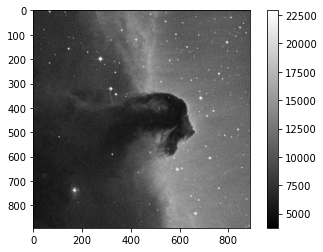

In [29]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

Si nous voulons voir une image plus grande à l'écran:

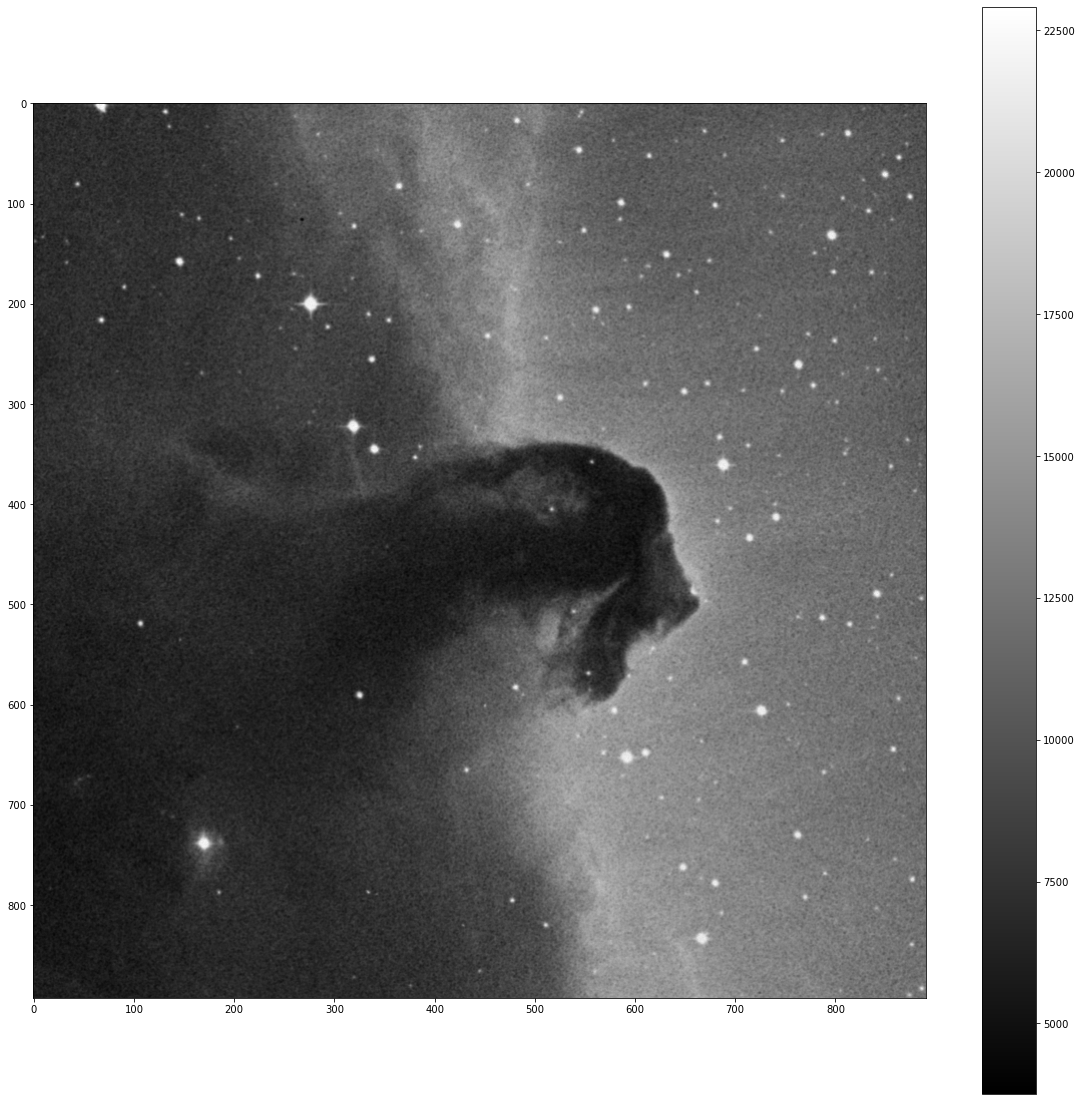

In [30]:
plt.figure(figsize = (20,20))
plt.imshow(image_data, cmap='gray')
plt.colorbar()

Nous pouvons aussi obtenir quelques statistiques de base sur la valeur des pixels de notre image (Stdev = écart-type):

In [31]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))


Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046


Nous allons maintenant afficher l'histogramme de notre image, à l'aide de la fonction plt.hist. La première chose à faire est ce transformer nos données. En effet, la fonction plt.hist prend en argument un tableau unidimensionnel alors que notre image est un tableau à deux dimensions (une matrice en fait). Nous utilisons pour cela la fonction flatten

In [9]:
print(type(image_data.flatten()))


<class 'numpy.ndarray'>


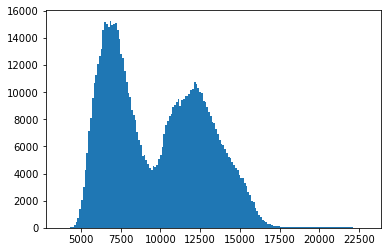

In [10]:
histogram = plt.hist(image_data.flatten(), bins='auto')


Nous pouvons aussi faire un "stretch" de l'image

In [11]:
from matplotlib.colors import LogNorm

[Text(1, 0, '5,000'), Text(1, 0, '10,000'), Text(1, 0, '20,000')]

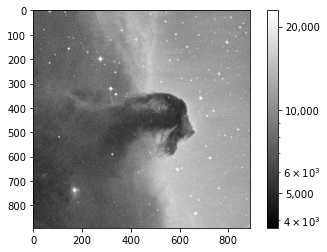

In [12]:
plt.imshow(image_data, cmap='gray', norm=LogNorm())

# I chose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])